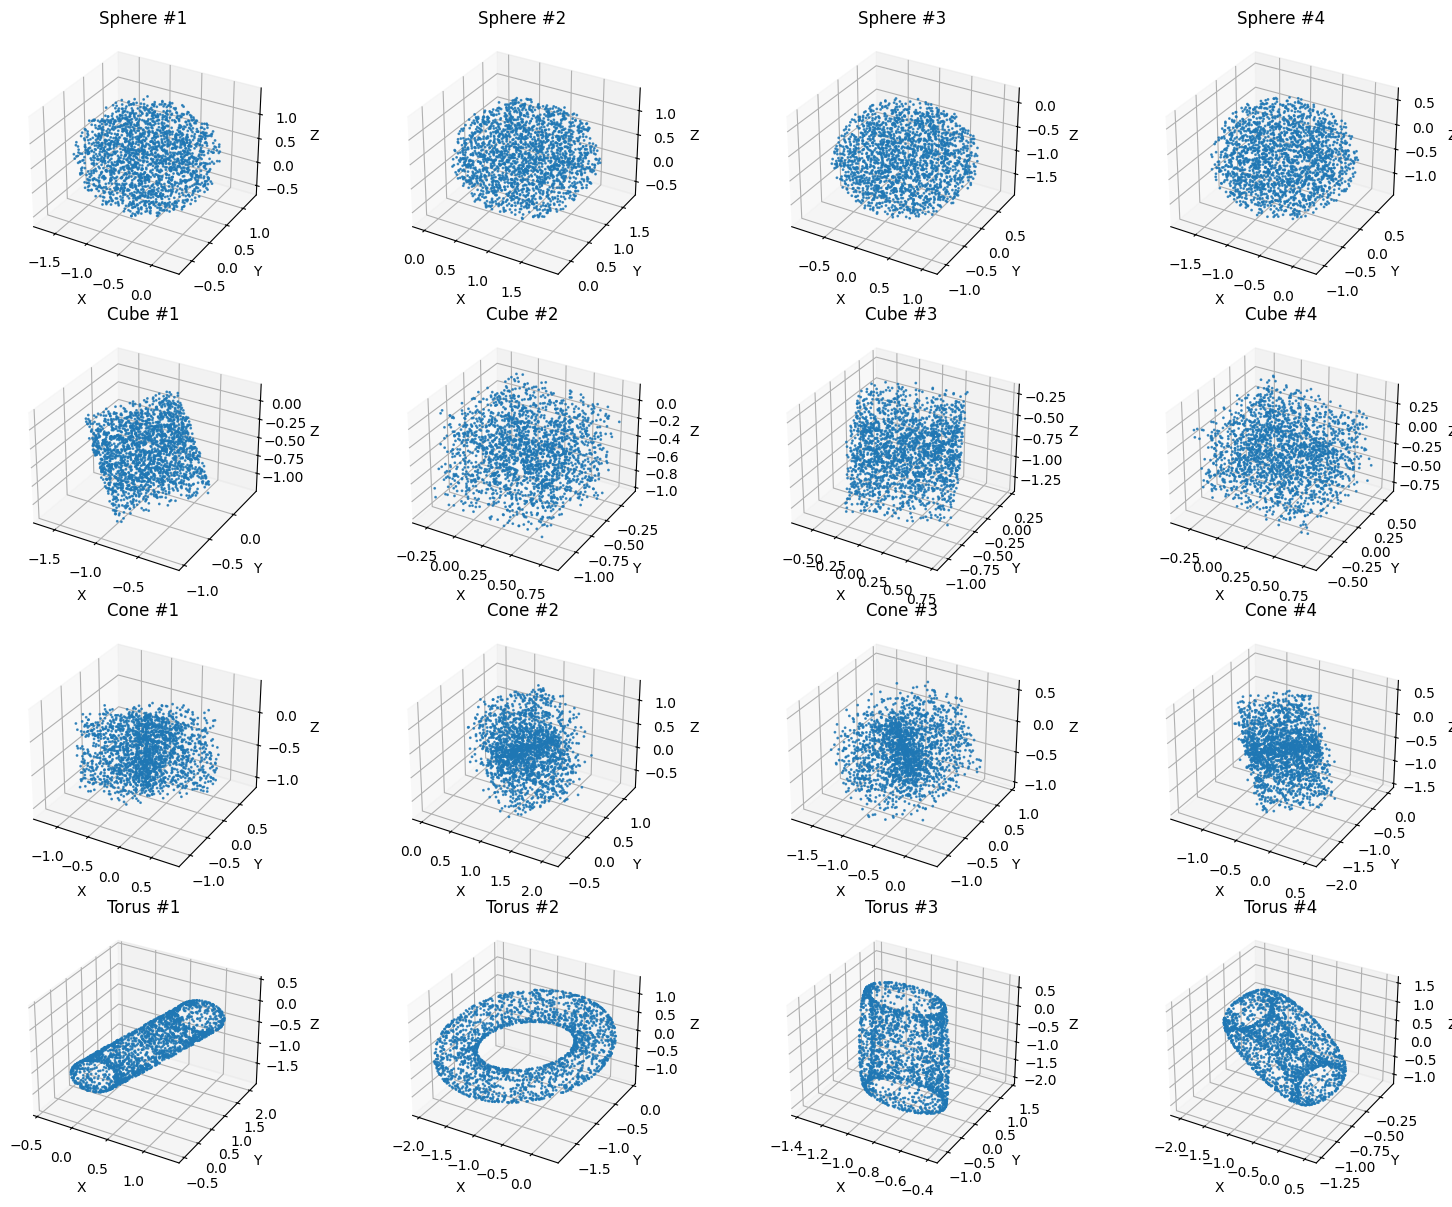

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Utility functions
def generate_sphere(num_points=1024, radius=1.0):
    """Generate a sphere point cloud."""
    phi = np.random.uniform(0, 2 * np.pi, num_points)
    costheta = np.random.uniform(-1, 1, num_points)
    u = np.random.uniform(0, 1, num_points)

    theta = np.arccos(costheta)
    r = radius * (u ** (1/3))

    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)

    return np.stack([x, y, z], axis=1)

def generate_cube(num_points=1024, side_length=1.0):
    """Generate a cube point cloud."""
    points = np.random.uniform(-side_length / 2, side_length / 2, (num_points, 3))
    return points

def generate_cone(num_points=1024, height=1.0, radius=1.0):
    """Generate a cone point cloud."""
    angles = np.random.uniform(0, 2 * np.pi, num_points)
    radii = np.random.uniform(0, radius, num_points)
    z = np.random.uniform(0, height, num_points)

    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    z = z

    return np.stack([x, y, z], axis=1)

def generate_torus(num_points=1024, radius=1.0, tube_radius=0.3):
    """Generate a torus point cloud."""
    theta = np.random.uniform(0, 2 * np.pi, num_points)
    phi = np.random.uniform(0, 2 * np.pi, num_points)

    x = (radius + tube_radius * np.cos(phi)) * np.cos(theta)
    y = (radius + tube_radius * np.cos(phi)) * np.sin(theta)
    z = tube_radius * np.sin(phi)

    return np.stack([x, y, z], axis=1)

def apply_rotation_translation(points, rotation_matrix, translation):
    """Apply rotation and translation to a point cloud."""
    rotated = points @ rotation_matrix.T
    translated = rotated + translation
    return translated

def random_rotation_matrix():
    """Generate a random 3D rotation matrix."""
    theta = np.random.uniform(0, 2 * np.pi)
    phi = np.random.uniform(0, 2 * np.pi)
    psi = np.random.uniform(0, 2 * np.pi)

    Rz = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

    Ry = np.array([
        [np.cos(phi), 0, np.sin(phi)],
        [0, 1, 0],
        [-np.sin(phi), 0, np.cos(phi)]
    ])

    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(psi), -np.sin(psi)],
        [0, np.sin(psi), np.cos(psi)]
    ])

    return Rz @ Ry @ Rx

# Generate dataset
def generate_dataset(num_samples_per_class=100, num_points=1024):
    """Generate a dataset with multiple classes of point clouds."""
    classes = ['Sphere', 'Cube', 'Cone', 'Torus']
    data = []
    labels = []

    for cls in classes:
        for _ in range(num_samples_per_class):
            if cls == 'Sphere':
                points = generate_sphere(num_points)
            elif cls == 'Cube':
                points = generate_cube(num_points)
            elif cls == 'Cone':
                points = generate_cone(num_points)
            elif cls == 'Torus':
                points = generate_torus(num_points)

            # Apply random rotation and translation
            rotation_matrix = random_rotation_matrix()
            translation = np.random.uniform(-1, 1, size=(3,))
            points = apply_rotation_translation(points, rotation_matrix, translation)

            data.append(points)
            labels.append(cls)

    return np.array(data), np.array(labels)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualization function
def visualize_samples_3d(data, labels, classes, num_samples=4):
    """
    Visualize 4 samples from each class in a 3D scatter plot.
    """
    fig = plt.figure(figsize=(16, 12))
    sample_count = 1  # Subplot counter

    for cls_idx, cls_name in enumerate(classes):
        cls_indices = np.where(labels == cls_name)[0]  # Indices of samples in this class
        for sample_idx in range(num_samples):
            ax = fig.add_subplot(len(classes), num_samples, sample_count, projection='3d')
            points = data[cls_indices[sample_idx]]  # Get the sample's 3D points
            ax.scatter(
                points[:, 0], points[:, 1], points[:, 2],
                s=1, alpha=0.8  # Small point size for clarity
            )
            ax.set_title(f"{cls_name} #{sample_idx + 1}")
            ax.set_xlabel("X")
            ax.set_ylabel("Y")
            ax.set_zlabel("Z")
            ax.axis("on")
            sample_count += 1

    plt.tight_layout()
    plt.show()

# Generate dataset
num_samples_per_class = 100
num_points = 2048
data, labels = generate_dataset(num_samples_per_class=num_samples_per_class, num_points=num_points)
classes = ['Sphere', 'Cube', 'Cone', 'Torus']

# Visualize 4 samples of each class
visualize_samples_3d(data, labels, classes, num_samples=4)



In [7]:
def apply_random_rotation(points):
    """
    Apply a random 3D rotation to the point cloud.
    """
    theta = np.random.uniform(0, 2 * np.pi)  # Rotation around z-axis
    phi = np.random.uniform(0, 2 * np.pi)    # Rotation around y-axis
    psi = np.random.uniform(0, 2 * np.pi)    # Rotation around x-axis

    # Rotation matrices
    Rz = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])
    Ry = np.array([
        [np.cos(phi), 0, np.sin(phi)],
        [0, 1, 0],
        [-np.sin(phi), 0, np.cos(phi)]
    ])
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(psi), -np.sin(psi)],
        [0, np.sin(psi), np.cos(psi)]
    ])

    # Combined rotation matrix
    rotation_matrix = Rz @ Ry @ Rx

    # Apply rotation
    rotated_points = points @ rotation_matrix.T
    return rotated_points


def generate_dataset(num_samples_per_class=100, num_points=2048):
    classes = ['Sphere', 'Cube', 'Cone', 'Torus']
    data, labels = [], []
    for label, shape in enumerate(classes):
        for _ in range(num_samples_per_class):
            if shape == 'Sphere':
                points = np.random.uniform(-1, 1, (num_points, 3))
                points /= np.linalg.norm(points, axis=1, keepdims=True)
            elif shape == 'Cube':
                points = np.random.uniform(-1, 1, (num_points, 3))
            elif shape == 'Cone':
                angles = np.random.uniform(0, 2 * np.pi, num_points)
                radii = np.random.uniform(0, 1, num_points)
                z = np.random.uniform(0, 1, num_points)
                x = radii * np.cos(angles)
                y = radii * np.sin(angles)
                points = np.stack([x, y, z], axis=1)
            elif shape == 'Torus':
                theta = np.random.uniform(0, 2 * np.pi, num_points)
                phi = np.random.uniform(0, 2 * np.pi, num_points)
                r = 0.2
                R = 1.0
                x = (R + r * np.cos(phi)) * np.cos(theta)
                y = (R + r * np.cos(phi)) * np.sin(theta)
                z = r * np.sin(phi)
                points = np.stack([x, y, z], axis=1)

            # Apply random rotation
            points = apply_random_rotation(points)
            data.append(points)
            labels.append(label)
    return np.array(data), np.array(labels)


# Generate the dataset
num_samples_per_class = 100
num_points = 2048
data, labels = generate_dataset(num_samples_per_class=num_samples_per_class, num_points=num_points)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 192ms/step - accuracy: 0.2881 - loss: 9.6433 - val_accuracy: 0.2250 - val_loss: 2.5296
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3015 - loss: 4.6512 - val_accuracy: 0.5000 - val_loss: 2.4504
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5766 - loss: 2.2285 - val_accuracy: 0.3875 - val_loss: 2.3973
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7898 - loss: 1.5590 - val_accuracy: 0.3250 - val_loss: 2.3598
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9277 - loss: 1.2787 - val_accuracy: 0.3250 - val_loss: 2.3568
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9116 - loss: 1.2468 - val_accuracy: 0.3250 - val_loss: 2.3613
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9334 - loss: 1.1570 - val_accuracy: 0.3250 - val_loss: 2.4468
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9535 - loss: 1.1306 - val_accuracy: 0.3250 - val_lo

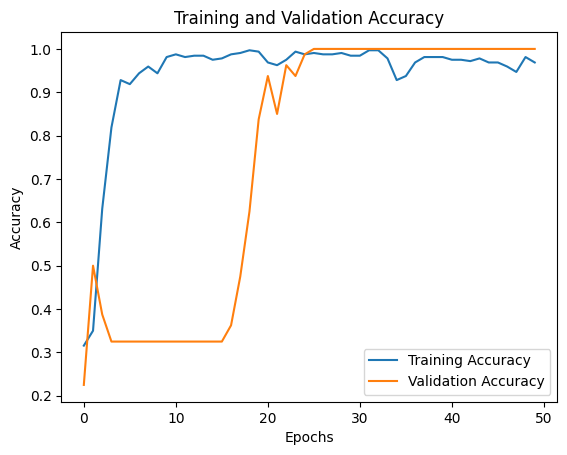

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt


# Define PointNet model using functional API
def build_pointnet(num_classes, num_points):
    inputs = tf.keras.Input(shape=(num_points, 3))  # Input layer for point clouds

    # Feature extraction
    x = layers.Conv1D(64, 1, activation='relu', kernel_regularizer=regularizers.l2(0.001))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(128, 1, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(1024, 1, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalMaxPooling1D()(x)  # Global feature vector

    # Fully connected layers
    x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Build model
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="PointNet")
    return model





# One-hot encode the labels
label_encoder = LabelBinarizer()
labels_one_hot = label_encoder.fit_transform(labels)

# Split the dataset into train and test sets
train_inputs, test_inputs, train_targets, test_targets = train_test_split(
    data, labels_one_hot, test_size=0.2, random_state=42
)

# Convert to TensorFlow tensors
train_inputs = tf.convert_to_tensor(train_inputs, dtype=tf.float32)
test_inputs = tf.convert_to_tensor(test_inputs, dtype=tf.float32)
train_targets = tf.convert_to_tensor(train_targets, dtype=tf.float32)
test_targets = tf.convert_to_tensor(test_targets, dtype=tf.float32)

# Build the PointNet model
model = build_pointnet(num_classes=len(label_encoder.classes_), num_points=num_points)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_inputs, train_targets,
    validation_data=(test_inputs, test_targets),
    epochs=50,
    batch_size=16
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_inputs, test_targets)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 455ms/step


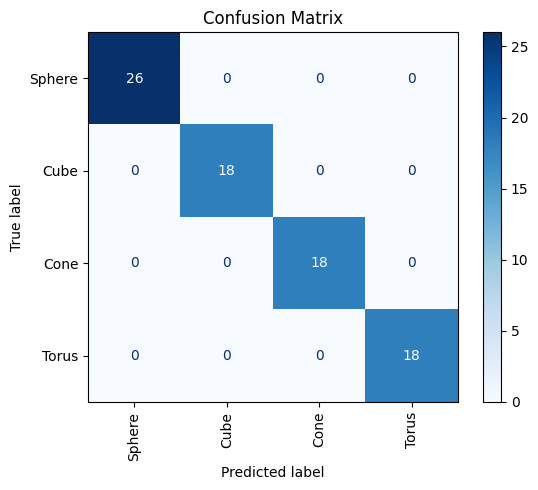

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predict the labels for the test set
predictions = model.predict(test_inputs)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
true_classes = np.argmax(test_targets, axis=1)  # Convert one-hot encoded labels to class indices

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes, labels=range(len(classes)))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


In [10]:
model.save("pointnet_model_new.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.6859, acc: 75.00%] [G loss: 0.6902]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


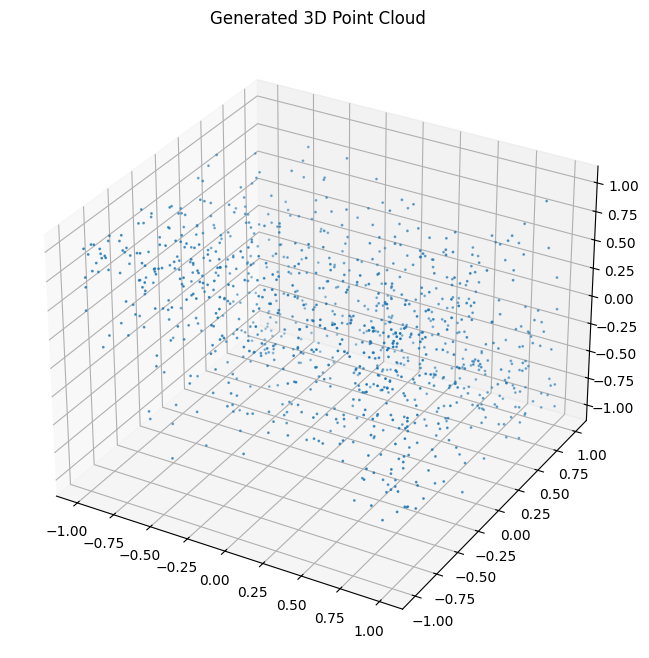

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generator model
def build_generator(latent_dim, num_points):
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_dim=latent_dim),
        layers.BatchNormalization(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(num_points * 3, activation='tanh'),  # Generate (num_points, 3)
        layers.Reshape((num_points, 3))
    ])
    return model

# Discriminator model
def build_discriminator(num_points):
    model = models.Sequential([
        layers.Conv1D(64, 1, activation='relu', input_shape=(num_points, 3)),
        layers.BatchNormalization(),
        layers.Conv1D(128, 1, activation='relu'),
        layers.BatchNormalization(),
        layers.Conv1D(256, 1, activation='relu'),
        layers.BatchNormalization(),
        layers.GlobalMaxPooling1D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Output: Real (1) or Fake (0)
    ])
    return model

# GAN model combining generator and discriminator
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze discriminator when training GAN
    model = models.Sequential([
        generator,
        discriminator
    ])
    return model


# Hyperparameters
latent_dim = 128
num_points = 1024
num_samples_per_class = 100
batch_size = 32
epochs = 1000
data, labels = generate_dataset(num_samples_per_class=num_samples_per_class, num_points=num_points)

# Normalize data
data = (data - np.min(data)) / (np.max(data) - np.min(data)) * 2 - 1  # Normalize to [-1, 1]

# Build GAN components
generator = build_generator(latent_dim, num_points)
discriminator = build_discriminator(num_points)
gan = build_gan(generator, discriminator)

# Compile models
discriminator.compile(optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])
gan.compile(optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), loss='binary_crossentropy')

# Training loop
real_labels = np.ones((batch_size, 1))
fake_labels = np.zeros((batch_size, 1))


for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, data.shape[0], batch_size)
    real_point_clouds = data[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_point_clouds = generator.predict(noise)

    # Train discriminator on real and fake data
    d_loss_real = discriminator.train_on_batch(real_point_clouds, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_point_clouds, fake_labels)

    # Handle the loss and accuracy (extract scalar values)
    d_loss = 0.5 * (d_loss_real[0] + d_loss_fake[0])
    d_acc = 0.5 * (d_loss_real[1] + d_loss_fake[1]) if len(d_loss_real) > 1 else 0.0

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, real_labels)
    g_loss = g_loss if isinstance(g_loss, float) else g_loss[0]  # Ensure scalar

    # Print progress
    if epoch % 100 == 0:
        print(f"{epoch} [D loss: {d_loss:.4f}, acc: {100 * d_acc:.2f}%] [G loss: {g_loss:.4f}]")



# Save the generator model
generator.save("3d_point_cloud_generator.h5")

# Example generation
noise = np.random.normal(0, 1, (1, latent_dim))
generated_points = generator.predict(noise)

# Visualize generated point cloud
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(generated_points[0, :, 0], generated_points[0, :, 1], generated_points[0, :, 2], s=1)
ax.set_title("Generated 3D Point Cloud")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


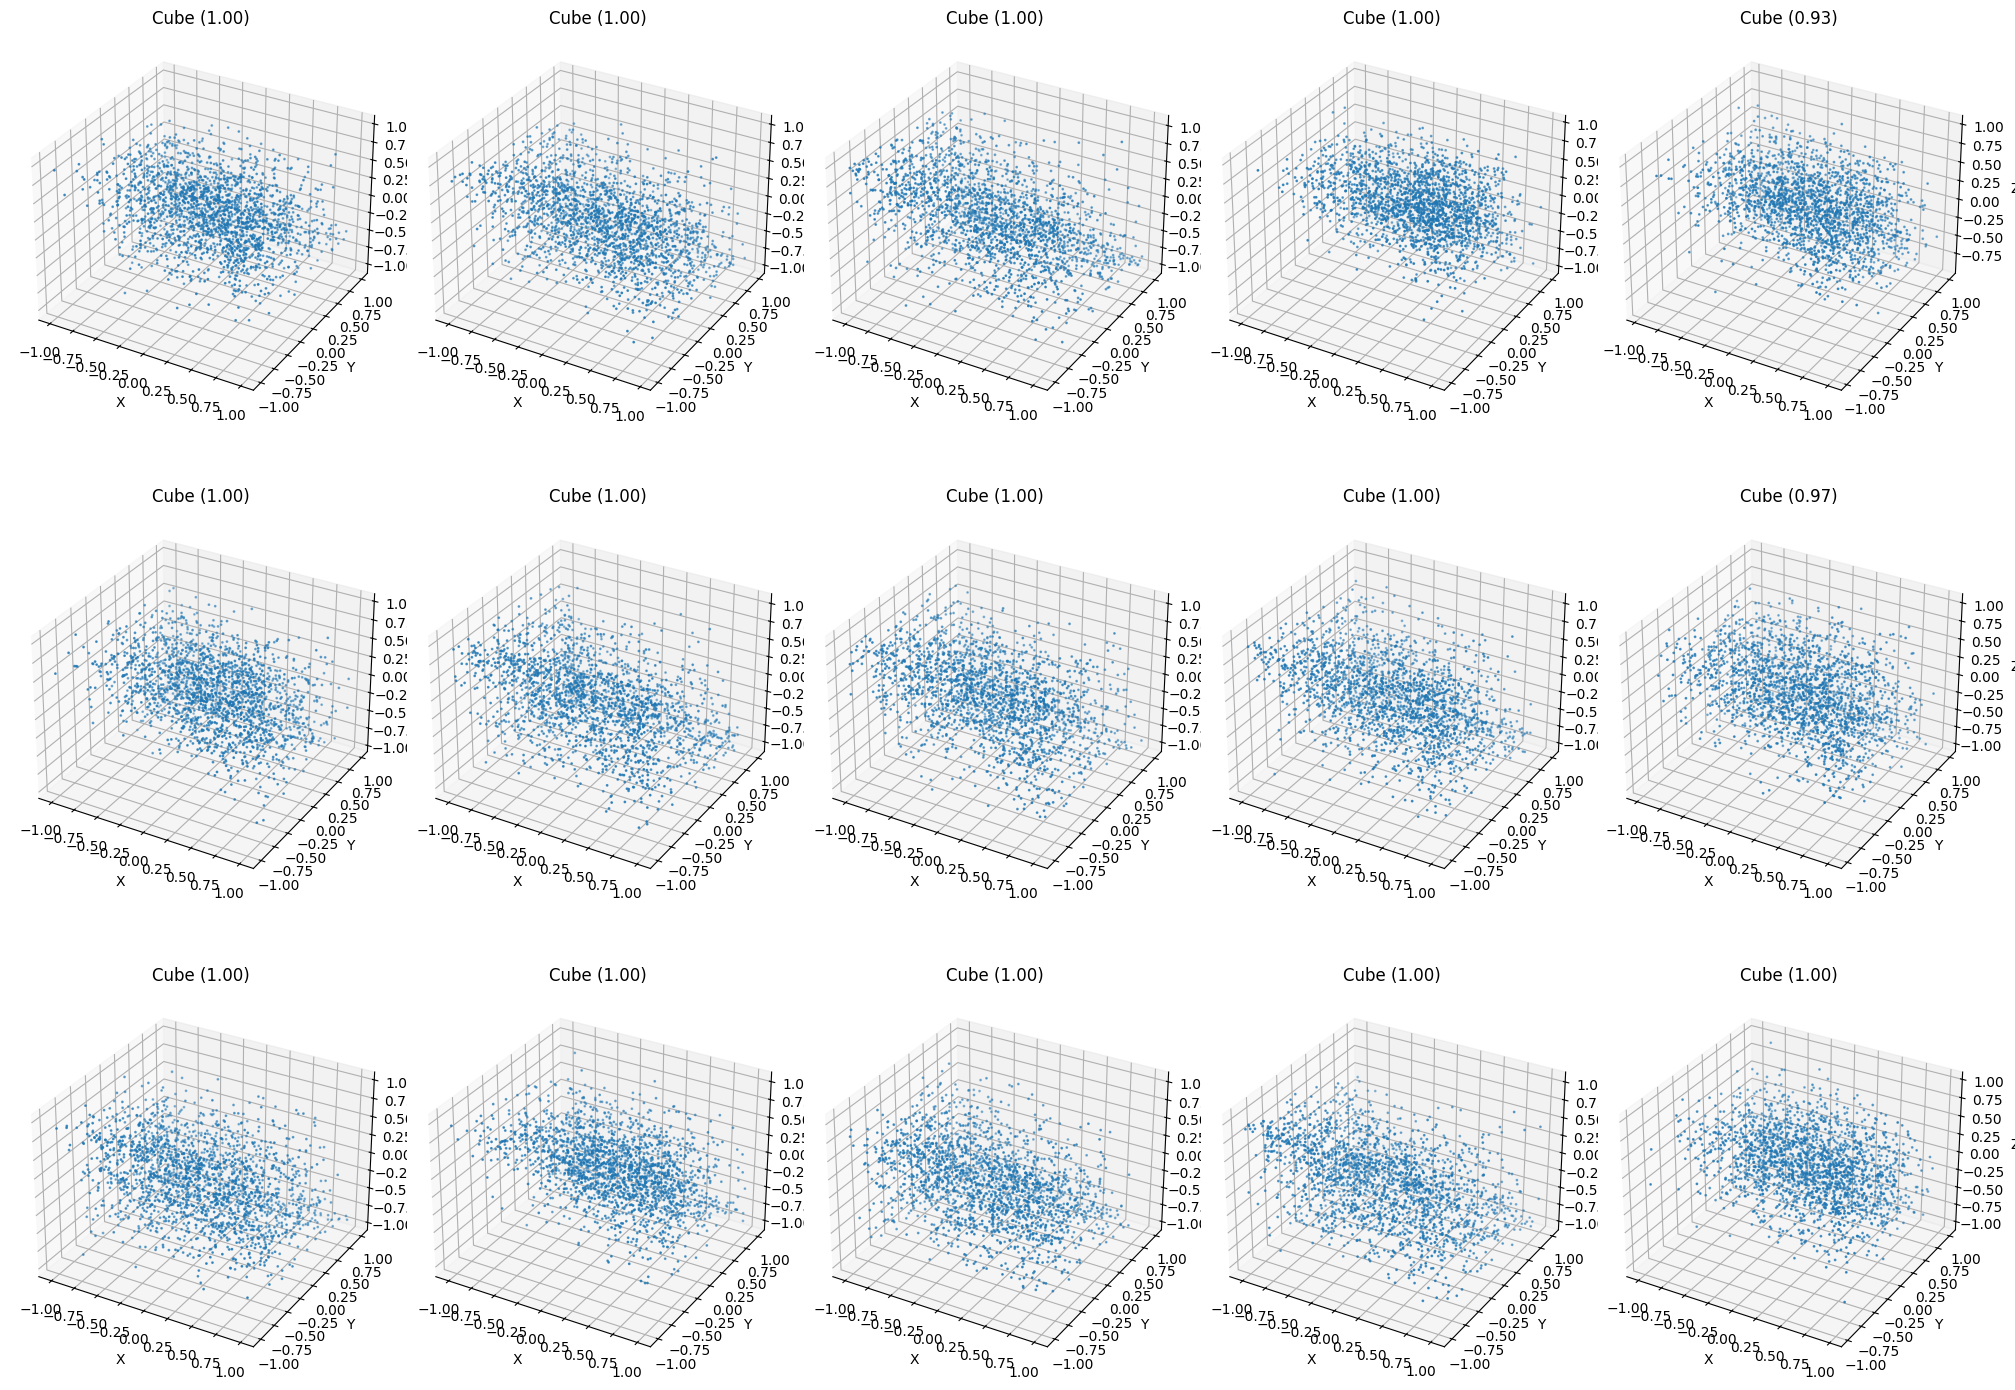

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp1d

# Load the trained PointNet model
pointnet_model = tf.keras.models.load_model("pointnet_model.h5")

# Load the trained generator model
generator = tf.keras.models.load_model("3d_point_cloud_generator.h5")

# Function to upsample point clouds to match PointNet input shape
def upsample_point_clouds(points, target_num_points=2048):
    current_num_points = points.shape[1]
    if current_num_points == target_num_points:
        return points  # No change needed

    # Interpolation along each dimension
    x = np.linspace(0, 1, current_num_points)
    interp_points = []
    for i in range(points.shape[0]):  # Batch size
        interp_func = interp1d(x, points[i], axis=0, kind='linear')
        interp_points.append(interp_func(np.linspace(0, 1, target_num_points)))
    return np.array(interp_points)

# Hyperparameters
latent_dim = 128
num_points = 1024  # Number of points generated by the GAN

# Generate 15 different outputs
num_samples = 15
noise = np.random.normal(0, 1, (num_samples, latent_dim))
generated_point_clouds = generator.predict(noise)

# Upsample the generated point clouds to 2048 points to match PointNet input
generated_point_clouds = upsample_point_clouds(generated_point_clouds, target_num_points=2048)

# Predict classes using PointNet
predictions = pointnet_model.predict(generated_point_clouds)
predicted_classes = np.argmax(predictions, axis=1)
class_probabilities = np.max(predictions, axis=1)

# Class labels (update based on your dataset)
class_labels = ['Sphere', 'Cube', 'Cone', 'Torus']

# Visualize generated outputs with predicted class and probability
fig = plt.figure(figsize=(20, 15))
for i in range(num_samples):
    ax = fig.add_subplot(3, 5, i + 1, projection='3d')
    ax.scatter(generated_point_clouds[i, :, 0],
               generated_point_clouds[i, :, 1],
               generated_point_clouds[i, :, 2],
               s=1)
    predicted_label = class_labels[predicted_classes[i]]
    probability = class_probabilities[i]
    ax.set_title(f"{predicted_label} ({probability:.2f})")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

plt.tight_layout()
plt.show()


Epoch 0/5000 [D loss: 1.2020] [G loss: 0.7360]
Epoch 100/5000 [D loss: 0.4166] [G loss: 4.9938]
Epoch 200/5000 [D loss: 0.6702] [G loss: 5.2809]
Epoch 300/5000 [D loss: 0.0454] [G loss: 6.0345]
Epoch 400/5000 [D loss: 0.1067] [G loss: 5.8340]
Epoch 500/5000 [D loss: 0.1663] [G loss: 4.5996]
Epoch 600/5000 [D loss: 0.0122] [G loss: 6.2475]
Epoch 700/5000 [D loss: 0.0788] [G loss: 6.6198]
Epoch 800/5000 [D loss: 0.1030] [G loss: 14.4470]
Epoch 900/5000 [D loss: 0.0260] [G loss: 4.4644]
Epoch 1000/5000 [D loss: 0.4936] [G loss: 5.9513]
Epoch 1100/5000 [D loss: 0.0028] [G loss: 18.6777]
Epoch 1200/5000 [D loss: 0.0145] [G loss: 8.2582]
Epoch 1300/5000 [D loss: 0.0656] [G loss: 6.0827]
Epoch 1400/5000 [D loss: 0.3474] [G loss: 9.0814]
Epoch 1500/5000 [D loss: 0.0000] [G loss: 17.2453]
Epoch 1600/5000 [D loss: 0.0001] [G loss: 44.2267]
Epoch 1700/5000 [D loss: 0.0084] [G loss: 9.2128]
Epoch 1800/5000 [D loss: 0.1292] [G loss: 9.8401]
Epoch 1900/5000 [D loss: 0.0000] [G loss: 51.7892]
Epoch 2

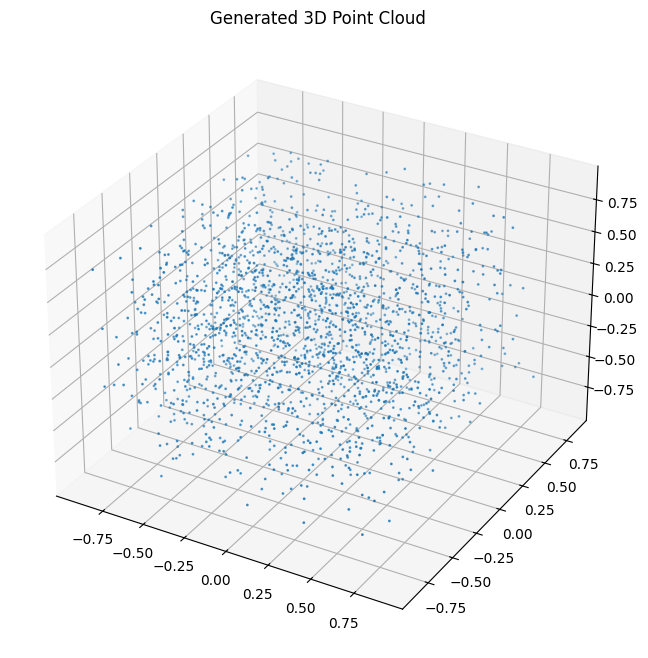

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generator model
class Generator(nn.Module):
    def __init__(self, latent_dim, num_points):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, num_points * 3),
            nn.Tanh()
        )

    def forward(self, z):
        output = self.model(z)
        return output.view(-1, num_points, 3)  # Reshape to (batch_size, num_points, 3)


# Discriminator model
class Discriminator(nn.Module):
    def __init__(self, num_points):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(num_points * 3, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, point_cloud):
        return self.model(point_cloud)


# Hyperparameters
latent_dim = 128
num_points = 2048
batch_size = 32
epochs = 5000
lr = 0.0002
data, labels = generate_dataset(num_samples_per_class=100, num_points=num_points)

# Normalize data
data = (data - np.min(data)) / (np.max(data) - np.min(data)) * 2 - 1  # Normalize to [-1, 1]

# Convert dataset to PyTorch tensors
data_tensor = torch.tensor(data, dtype=torch.float32)
dataset = torch.utils.data.TensorDataset(data_tensor)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize models
generator = Generator(latent_dim, num_points).to('cuda')
discriminator = Discriminator(num_points).to('cuda')

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Loss function
criterion = nn.BCELoss()

# Training loop
real_labels = torch.ones(batch_size, 1).to('cuda')
fake_labels = torch.zeros(batch_size, 1).to('cuda')

for epoch in range(epochs):
    for real_point_clouds, in dataloader:
        real_point_clouds = real_point_clouds.to('cuda')

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(real_point_clouds), real_labels[:real_point_clouds.size(0)])
        noise = torch.randn(real_point_clouds.size(0), latent_dim).to('cuda')
        fake_point_clouds = generator(noise)
        fake_loss = criterion(discriminator(fake_point_clouds.detach()), fake_labels[:real_point_clouds.size(0)])
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        g_loss = criterion(discriminator(fake_point_clouds), real_labels[:real_point_clouds.size(0)])
        g_loss.backward()
        optimizer_G.step()

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} [D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]")

# Save generator
torch.save(generator.state_dict(), "3d_point_cloud_generator.pth")

# Generate and visualize a random point cloud
generator.eval()
noise = torch.randn(1, latent_dim).to('cuda')
generated_points = generator(noise).detach().cpu().numpy()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(generated_points[0, :, 0], generated_points[0, :, 1], generated_points[0, :, 2], s=1)
ax.set_title("Generated 3D Point Cloud")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step


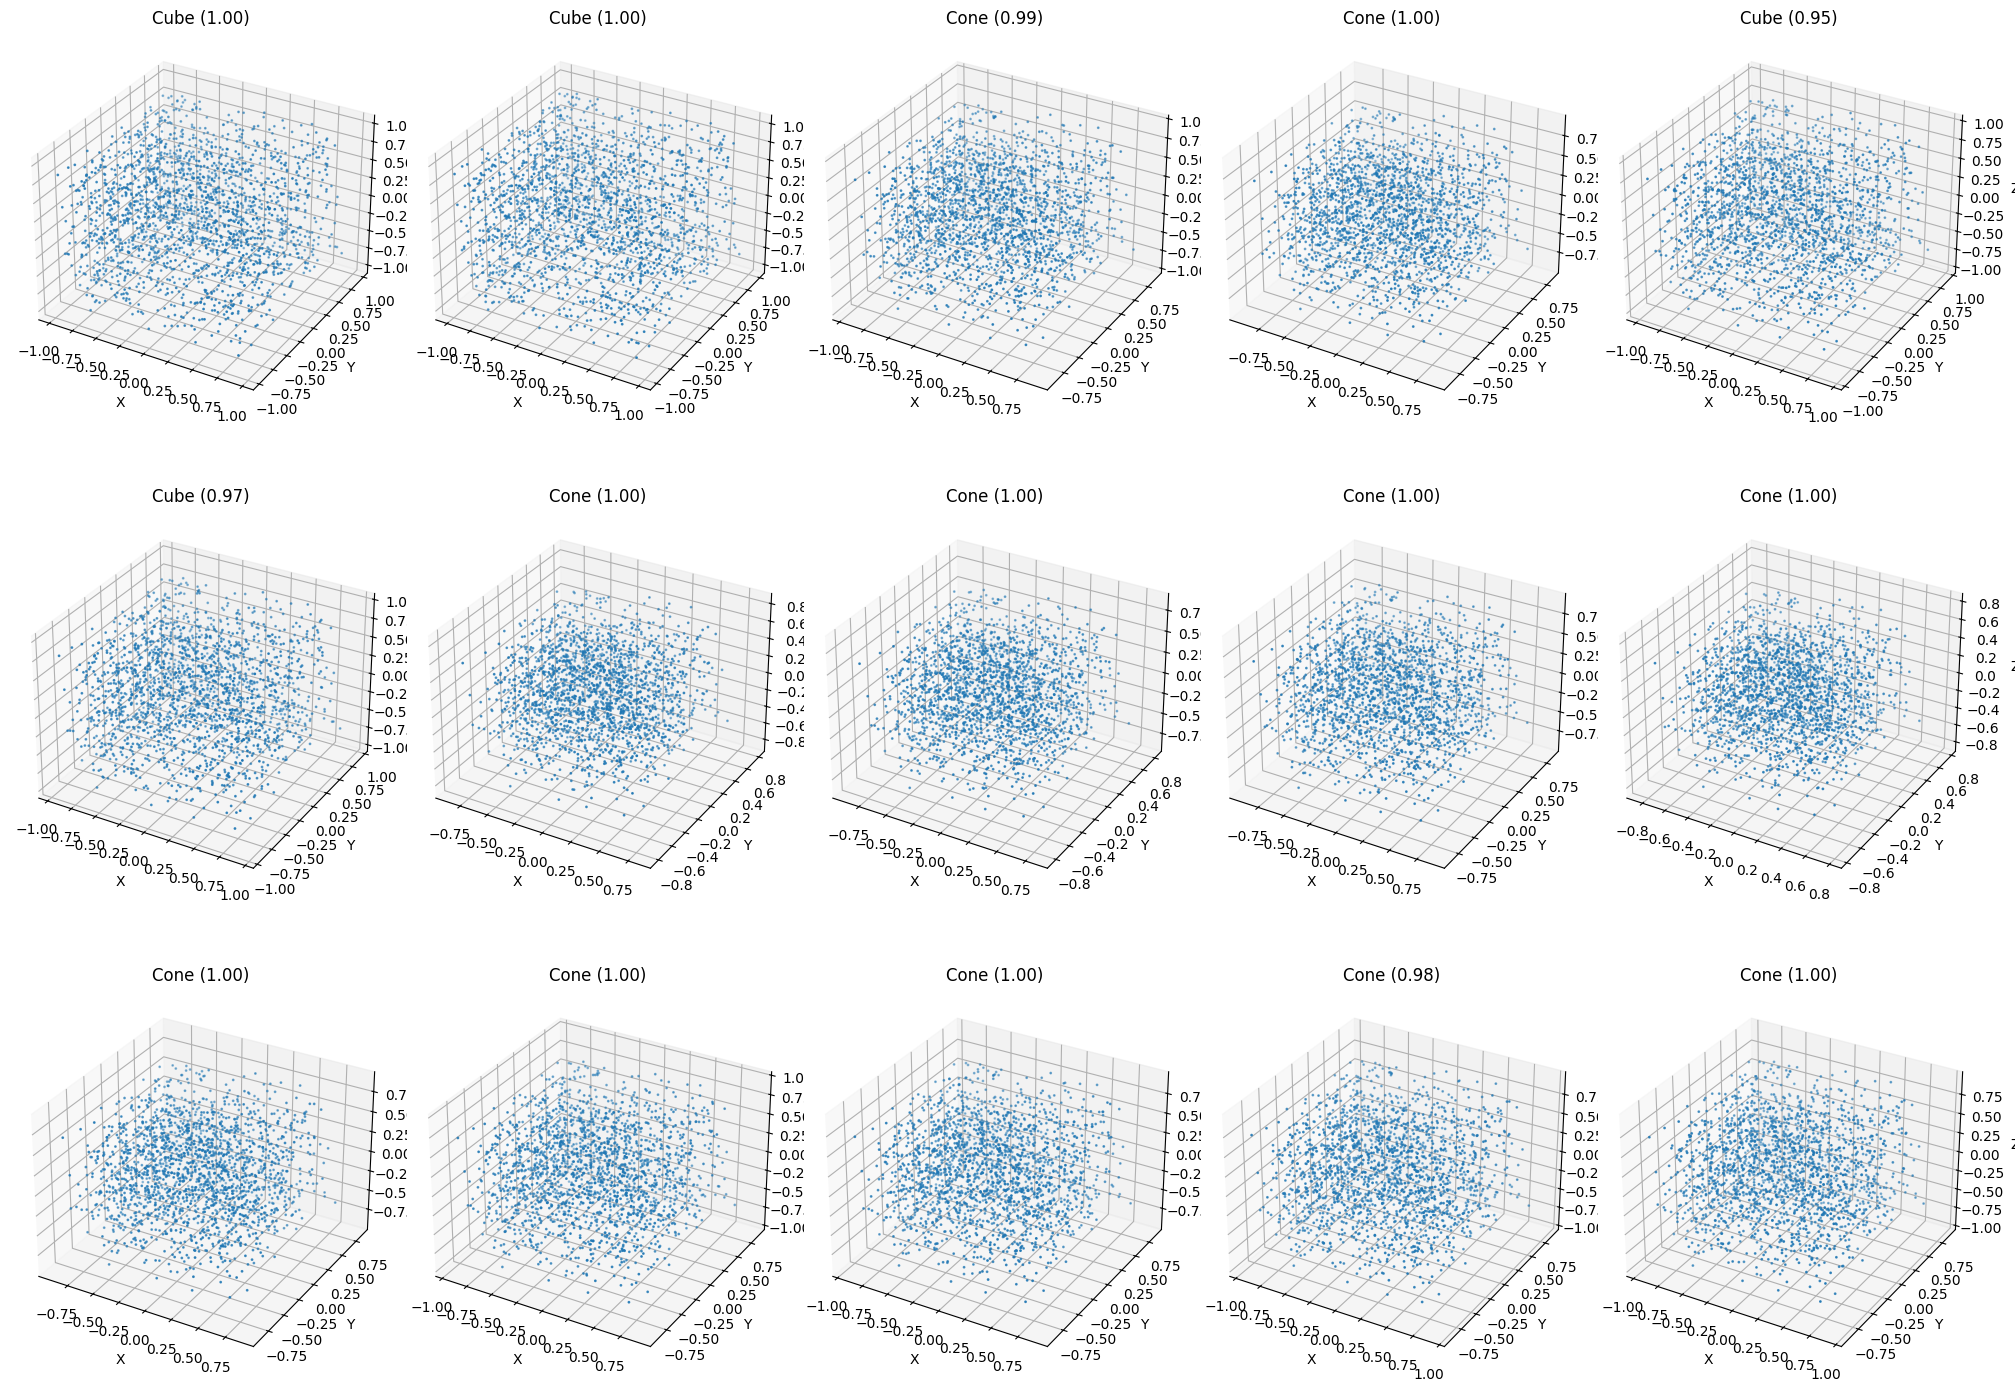

In [14]:
import tensorflow as tf

# Load the trained PointNet model
pointnet_model = tf.keras.models.load_model("pointnet_model.h5")

# Generate 15 outputs
num_samples = 15
noise = torch.randn(num_samples, latent_dim).to('cuda')
generated_point_clouds = generator(noise).detach().cpu().numpy()

# Predict classes using PointNet
predictions = pointnet_model.predict(generated_point_clouds)
predicted_classes = np.argmax(predictions, axis=1)
probabilities = np.max(predictions, axis=1)

# Class labels
class_labels = ['Sphere', 'Cube', 'Cone', 'Torus']

# Visualize generated outputs with predictions
fig = plt.figure(figsize=(20, 15))
for i in range(num_samples):
    ax = fig.add_subplot(3, 5, i + 1, projection='3d')
    ax.scatter(generated_point_clouds[i, :, 0],
               generated_point_clouds[i, :, 1],
               generated_point_clouds[i, :, 2],
               s=1)
    predicted_label = class_labels[predicted_classes[i]]
    probability = probabilities[i]
    ax.set_title(f"{predicted_label} ({probability:.2f})")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

plt.tight_layout()
plt.show()


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generator model
class Generator(nn.Module):
    def __init__(self, latent_dim, num_points):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, num_points * 3),
            nn.Tanh()
        )

    def forward(self, z):
        output = self.model(z)
        return output.view(-1, num_points, 3)  # Reshape to (batch_size, num_points, 3)


# Discriminator (Critic) model
class Discriminator(nn.Module):
    def __init__(self, num_points):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(num_points * 3, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1)  # No sigmoid for WGAN
        )

    def forward(self, point_cloud):
        return self.model(point_cloud)


# Hyperparameters
latent_dim = 128
num_points = 2048
batch_size = 32
epochs = 5000
lr = 0.0002
data, labels = generate_dataset(num_samples_per_class=100, num_points=num_points)

# Normalize data
data = (data - np.min(data)) / (np.max(data) - np.min(data)) * 2 - 1  # Normalize to [-1, 1]

# Convert dataset to PyTorch tensors
data_tensor = torch.tensor(data, dtype=torch.float32)
dataset = torch.utils.data.TensorDataset(data_tensor)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize models
generator = Generator(latent_dim, num_points).to('cuda')
discriminator = Discriminator(num_points).to('cuda')

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Training loop
real_labels = torch.ones(batch_size, 1).to('cuda')
fake_labels = torch.zeros(batch_size, 1).to('cuda')

for epoch in range(epochs):
    for real_point_clouds, in dataloader:
        real_point_clouds = real_point_clouds.to('cuda')

        # Train Discriminator (Critic)
        optimizer_D.zero_grad()
        real_loss = discriminator(real_point_clouds).mean()
        noise = torch.randn(real_point_clouds.size(0), latent_dim).to('cuda')
        fake_point_clouds = generator(noise)
        fake_loss = discriminator(fake_point_clouds).mean()

        # WGAN loss (Critic tries to maximize real_loss - fake_loss)
        d_loss = fake_loss - real_loss
        d_loss.backward()
        optimizer_D.step()

        # Clip weights to satisfy Lipschitz constraint
        for p in discriminator.parameters():
            p.data.clamp_(-0.01, 0.01)  # Clamp weights between -0.01 and 0.01

        # Train Generator
        if epoch % 5 == 0:  # Train generator less frequently (every 5 epochs)
            optimizer_G.zero_grad()
            g_loss = -discriminator(fake_point_clouds).mean()  # WGAN loss (Generator tries to minimize fake loss)
            g_loss.backward()
            optimizer_G.step()

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} [D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]")

# Save generator
torch.save(generator.state_dict(), "3d_point_cloud_generator_wgan.pth")

# Generate and visualize a random point cloud
generator.eval()
noise = torch.randn(1, latent_dim).to('cuda')
generated_points = generator(noise).detach().cpu().numpy()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(generated_points[0, :, 0], generated_points[0, :, 1], generated_points[0, :, 2], s=1)
ax.set_title("Generated 3D Point Cloud")
plt.show()
